In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

df=pd.read_csv("/kaggle/input/elecrict-vehicle/Electric_Vehicle_Population_Data.csv")
df.sample(10)

/kaggle/input/elecrict-vehicle/Electric_Vehicle_Population_Data.csv


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
114168,JTMEB3FVXP,Pierce,Tacoma,WA,98405.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,27.0,236422350,POINT (-122.45153 47.251135),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
92749,7SAYGDEE7N,Kittitas,Cle Elum,WA,98922.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,13.0,203416797,POINT (-120.938305 47.195355),PUGET SOUND ENERGY INC,5.303798e+10
137757,1G1FZ6S05N,King,North Bend,WA,98045.0,2022,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,211075259,POINT (-121.7814012 47.4935316),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
48808,3MW5P9J08N,Clark,Vancouver,WA,98682.0,2022,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,0,17.0,179277290,POINT (-122.5146473 45.67862),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
150509,KNDCR3L1XP,Pierce,Lakewood,WA,98499.0,2023,KIA,NIRO,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,29.0,240607699,POINT (-122.5181098 47.1712579),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
115701,7SAYGDEE6P,Pierce,University Place,WA,98467.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,28.0,249590834,POINT (-122.5404512 47.2074166),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
83917,KNDCR3L18P,King,Seattle,WA,98118.0,2023,KIA,NIRO,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,37.0,240777211,POINT (-122.28339 47.549285),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
133110,5YJ3E1EB1N,King,Bellevue,WA,98007.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,48.0,208519566,POINT (-122.147385 47.599975),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
104680,WA1VAAGE8K,Clark,Vancouver,WA,98665.0,2019,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,204,0,49.0,131550093,POINT (-122.66592 45.678565),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
66123,7SAXCAE55N,Snohomish,Marysville,WA,98270.0,2022,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,38.0,218259317,POINT (-122.17673 48.05542),PUGET SOUND ENERGY INC,5.306105e+10


**Information About Data**

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159467 entries, 0 to 159466
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         159467 non-null  object 
 1   County                                             159463 non-null  object 
 2   City                                               159463 non-null  object 
 3   State                                              159467 non-null  object 
 4   Postal Code                                        159463 non-null  float64
 5   Model Year                                         159467 non-null  int64  
 6   Make                                               159467 non-null  object 
 7   Model                                              159467 non-null  object 
 8   Electric Vehicle Type                              159467 non-null  object

In [3]:
df.isna().sum()/df.shape[0]*100

VIN (1-10)                                           0.000000
County                                               0.002508
City                                                 0.002508
State                                                0.000000
Postal Code                                          0.002508
Model Year                                           0.000000
Make                                                 0.000000
Model                                                0.000000
Electric Vehicle Type                                0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.000000
Electric Range                                       0.000000
Base MSRP                                            0.000000
Legislative District                                 0.226379
DOL Vehicle ID                                       0.000000
Vehicle Location                                     0.005644
Electric Utility                                     0.002508
2020 Cen

**Cleaning Null Values**

In [4]:
df.dropna(inplace=True)

**Checking Duplicate Value**

In [5]:
df.duplicated().sum()

0

**Removing Column**

In [6]:
df['State'].value_counts()

State
WA    159101
Name: count, dtype: int64

State column has only one value i.e WA means Washington D.C. So we can remove 'state' column

In [7]:
df.drop(columns='State',inplace=True)

**Univariate Analysis**

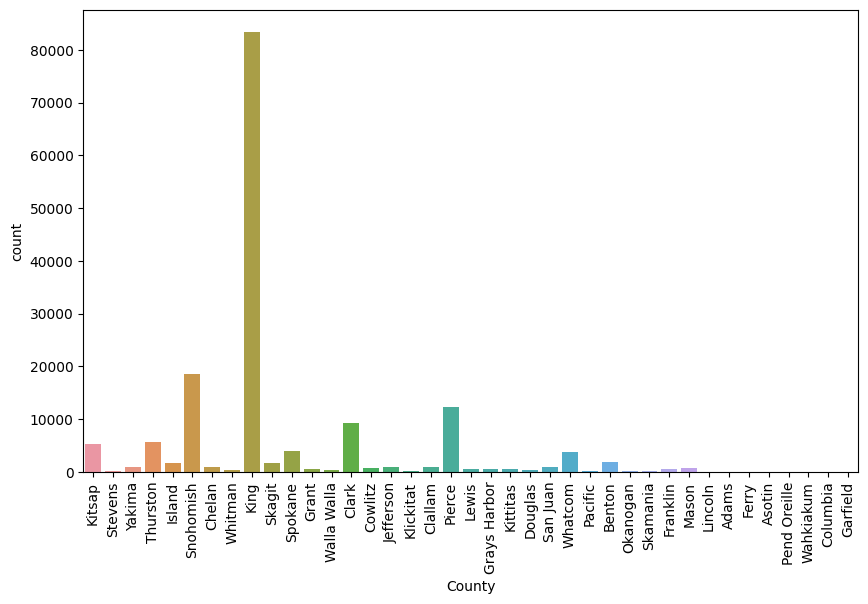

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(x='County',data=df)
plt.xticks(rotation=90);

based on our data, king country has the highest number of EV's registered.

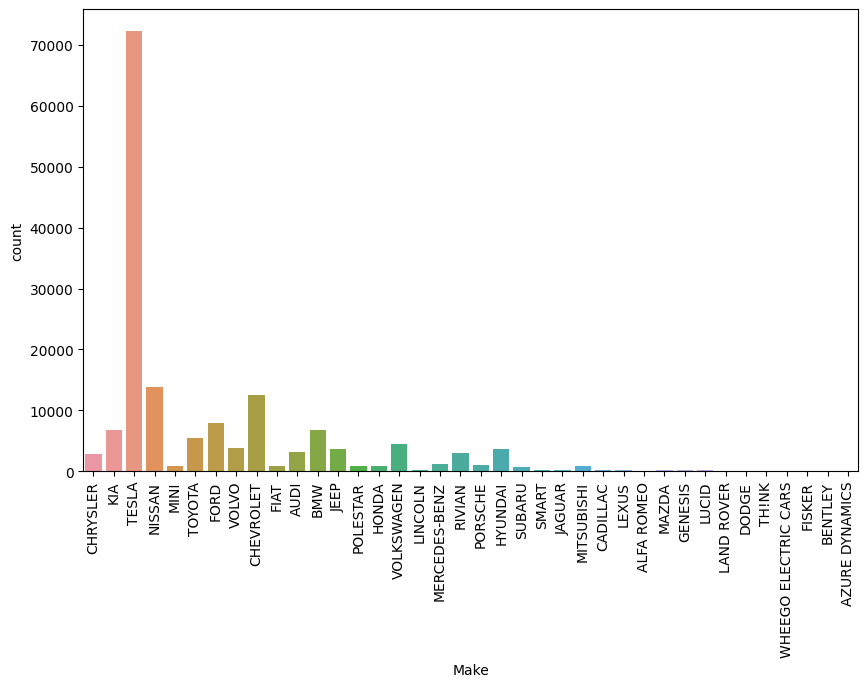

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(x='Make',data=df)
plt.xticks(rotation=90);

Tesla has the highest number of EV's registered.

<Axes: ylabel='count'>

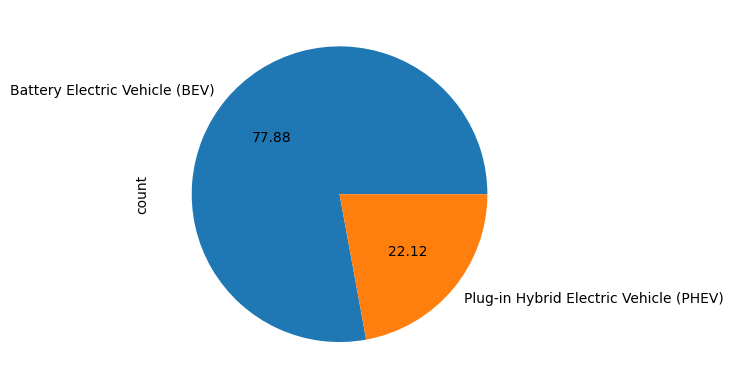

In [10]:
df['Electric Vehicle Type'].value_counts().plot(kind='pie',autopct='%.2f')

This figure depicts around 78% of EV's uses rechargeble battery pack and 22% of EV's use a combination of electric and gasoline or diesel engines

<Axes: ylabel='count'>

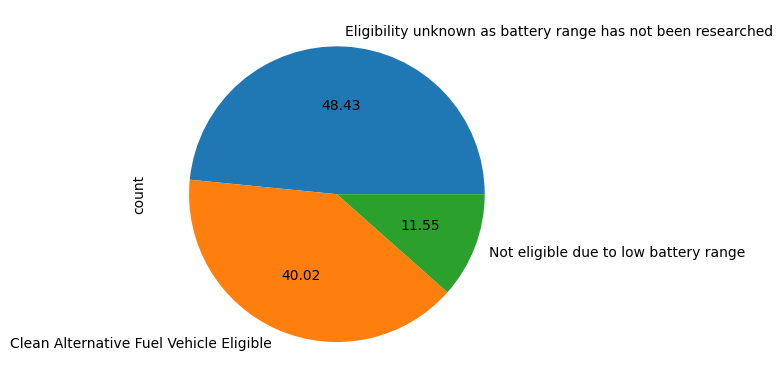

In [11]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().plot(kind='pie',autopct='%.2f')

Nearly 40.02% of vehicles meet the qualifications for clean alternative fuel vehicle (CAFV) eligible whereas nearly half of the vehicles remains in eligibility limbo due to the unconfirmed battery range, highlighting the need for greater research in this area.

**Bivariate Analysis**

/tmp/ipykernel_18/3921779495.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='County',y='Electric Range',data=df,ci=None)


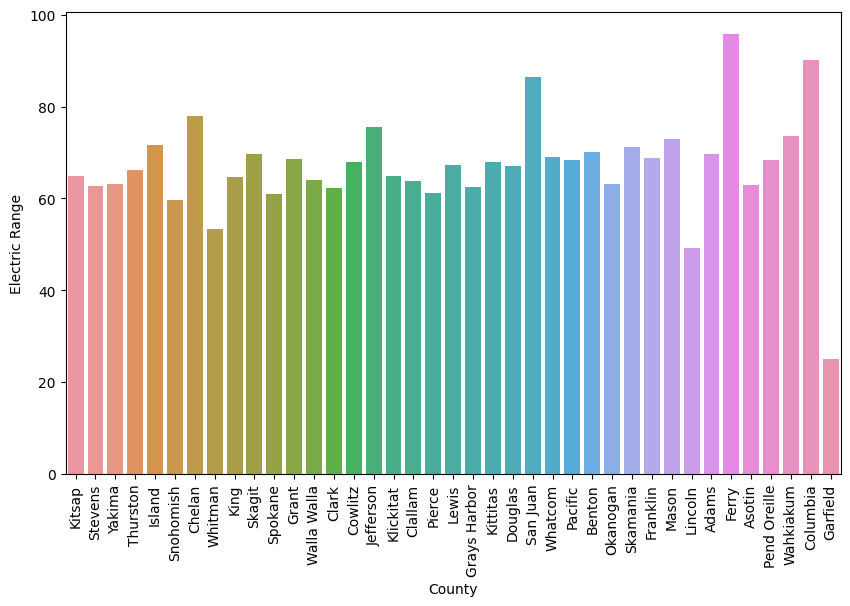

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(x='County',y='Electric Range',data=df,ci=None)
plt.xticks(rotation=90);

Electric Vehicles with longer ranges are popular in 'Ferry' country. 

<Axes: xlabel='Electric Vehicle Type', ylabel='Electric Range'>

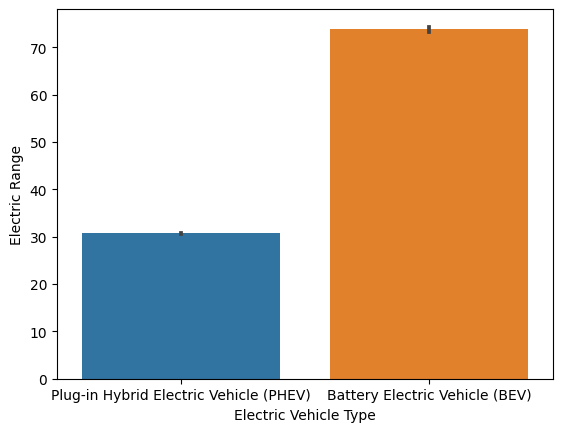

In [13]:
sns.barplot(x='Electric Vehicle Type',y='Electric Range',data=df)

BEV's boast longer electric ranges compared to PHEV's, enabling extended emission-free driving.

(array([0, 1, 2]),
 [Text(0, 0, 'Clean Alternative Fuel Vehicle Eligible'),
  Text(1, 0, 'Eligibility unknown as battery range has not been researched'),
  Text(2, 0, 'Not eligible due to low battery range')])

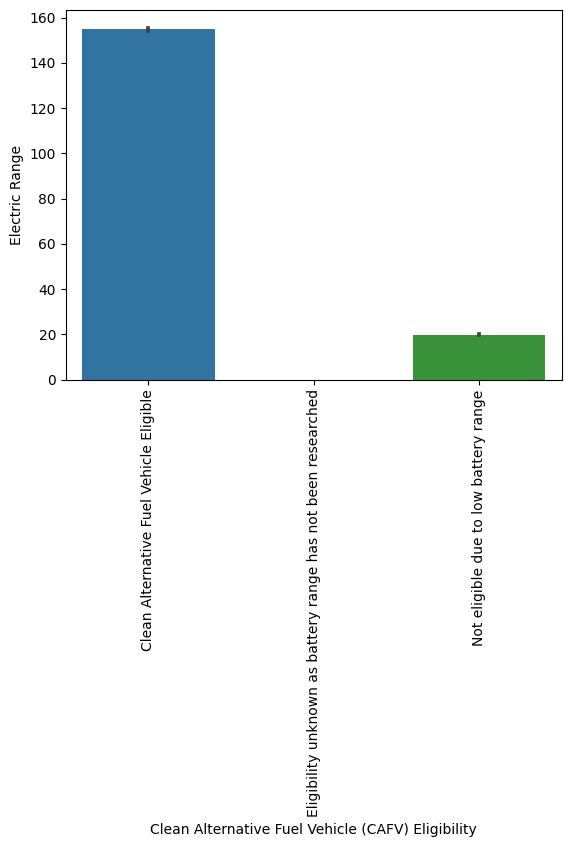

In [14]:
sns.barplot(x='Clean Alternative Fuel Vehicle (CAFV) Eligibility',y='Electric Range',data=df)
plt.xticks(rotation=90)

We can see that 
CAFV has higher electric ranges as these vehicles prioritize emissions reduction.

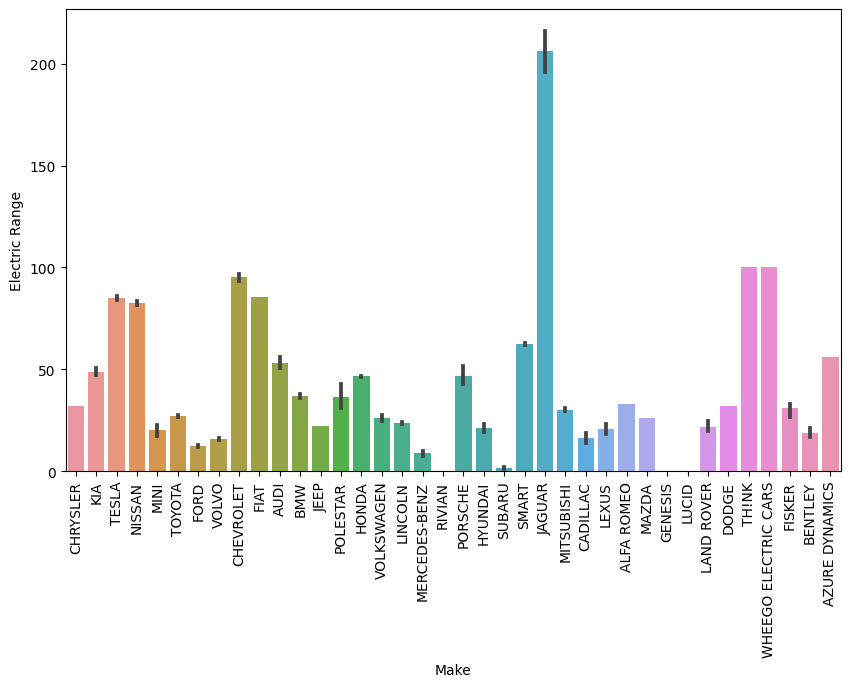

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(x='Make',y='Electric Range',data=df)
plt.xticks(rotation=90);

This figure depicts that the electric vehicle with longest range by the manufacturer is 'Jaguar'

<Axes: xlabel='Model Year', ylabel='Electric Range'>

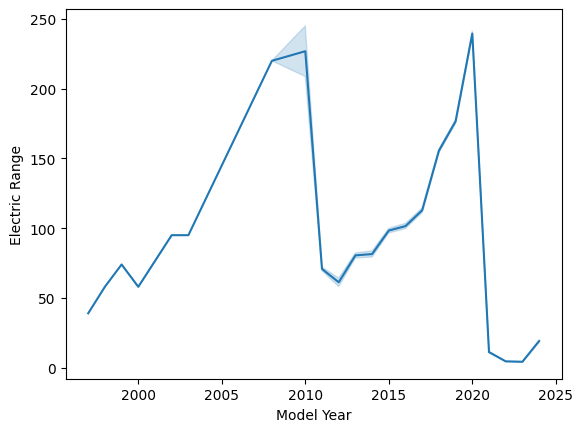

In [16]:
sns.lineplot(x='Model Year',y='Electric Range',data=df)

Electric Vehicle range has increased, from 39 miles in 1997 to 239.5 miles in 2020, representing a more like sixfold jump! 

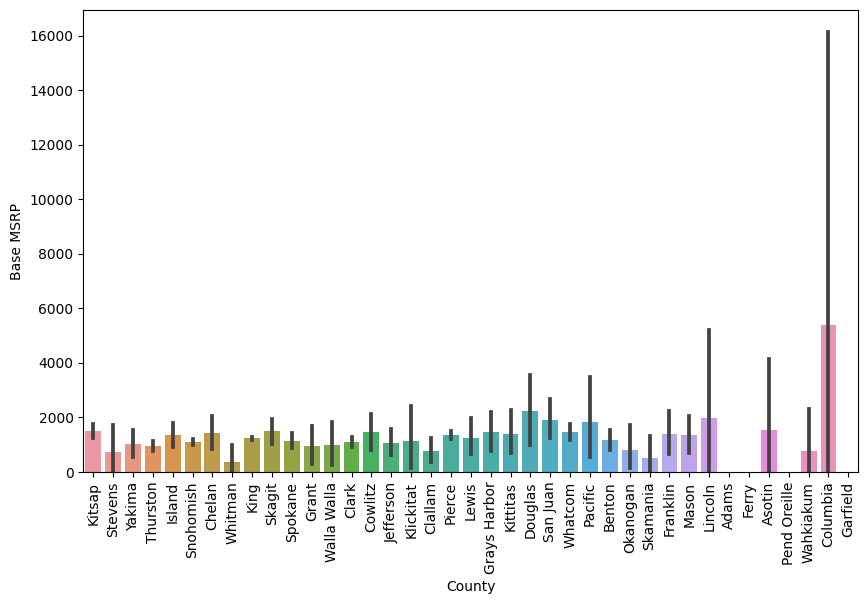

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x='County',y='Base MSRP',data=df)
plt.xticks(rotation=90);

'Columbia' has the highest base msrp as compared to others.

<Axes: xlabel='Electric Vehicle Type', ylabel='Base MSRP'>

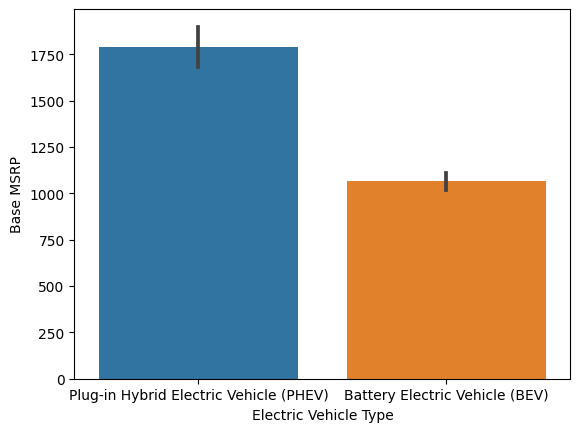

In [18]:
sns.barplot(x='Electric Vehicle Type',y='Base MSRP',data=df)

PHEV's generally have higher starting price than BEV

(array([0, 1, 2]),
 [Text(0, 0, 'Clean Alternative Fuel Vehicle Eligible'),
  Text(1, 0, 'Eligibility unknown as battery range has not been researched'),
  Text(2, 0, 'Not eligible due to low battery range')])

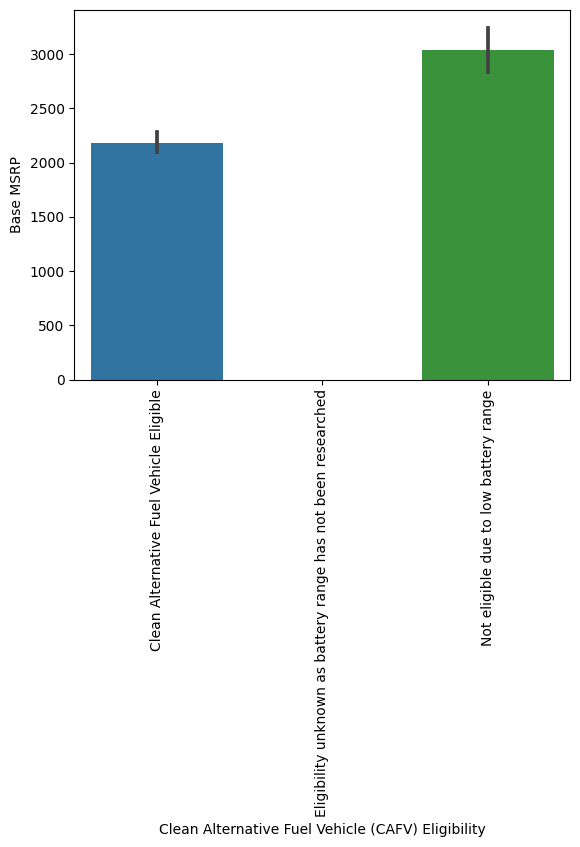

In [19]:
sns.barplot(x='Clean Alternative Fuel Vehicle (CAFV) Eligibility',y='Base MSRP',data=df)
plt.xticks(rotation=90)

Generally CAFV vehicle have lower starting price than "lower battery range" vehicle

 **"Please let me know, if there is any mistakes"**